# Joins and Bar Plot in Python


This notebook demonstrates how to perform various types of joins and create a bar plot using Python.
It is a Python adaptation of an R script using libraries such as Pandas and Plotly.


In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


# Sample GDP data (in billion USD)
gdp_data = pd.DataFrame({
    "Country": ["USA", "China", "Japan", "Germany", "India"],
    "GDP": [21433, 14343, 5082, 3861, 2875]
})

# Sample Inflation data (in %)
inflation_data = pd.DataFrame({
    "Country": ["USA", "China", "Japan", "UK", "India"],
    "Inflation": [1.2, 2.3, 0.5, 1.8, 4.5]
})

gdp_data
#inflation_data

,Country,GDP
0,USA,21433
1,China,14343
2,Japan,5082
3,Germany,3861
4,India,2875


## Joins in Detail

### 1. Inner Join

In [2]:

# Inner join: Keep only common countries
inner_join_result = pd.merge(gdp_data, inflation_data, on='Country', how='inner')
print("Inner Join Result:")
print(inner_join_result)


Inner Join Result:
  Country    GDP  Inflation
0     USA  21433        1.2
1   China  14343        2.3
2   Japan   5082        0.5
3   India   2875        4.5


### 2. Left Join

In [3]:

# Left join: Keep all rows from gdp_data
left_join_result = pd.merge(gdp_data, inflation_data, on='Country', how='left')
print("Left Join Result:")
print(left_join_result)


Left Join Result:
   Country    GDP  Inflation
0      USA  21433        1.2
1    China  14343        2.3
2    Japan   5082        0.5
3  Germany   3861        NaN
4    India   2875        4.5


### 3. Right Join

In [4]:

# Right join: Keep all rows from inflation_data
right_join_result = pd.merge(gdp_data, inflation_data, on='Country', how='right')
print("Right Join Result:")
print(right_join_result)


Right Join Result:
  Country      GDP  Inflation
0     USA  21433.0        1.2
1   China  14343.0        2.3
2   Japan   5082.0        0.5
3      UK      NaN        1.8
4   India   2875.0        4.5


### 4. Full Join

In [5]:

# Full join: Keep all rows from both datasets
full_join_result = pd.merge(gdp_data, inflation_data, on='Country', how='outer')
print("Full Join Result:")
print(full_join_result)


Full Join Result:
   Country      GDP  Inflation
0    China  14343.0        2.3
1  Germany   3861.0        NaN
2    India   2875.0        4.5
3    Japan   5082.0        0.5
4       UK      NaN        1.8
5      USA  21433.0        1.2


## Bar Plot: GDP and Inflation by Country

### Reshaping

In [6]:

# Full join to merge datasets
merged_data = pd.merge(gdp_data, inflation_data, on='Country', how='outer')

# Reshape data to long format
long_data = merged_data.melt(id_vars=['Country'], var_name='Variable', value_name='Value')

long_data

,Country,Variable,Value
0,China,GDP,14343.0
1,Germany,GDP,3861.0
2,India,GDP,2875.0
3,Japan,GDP,5082.0
4,UK,GDP,NaN
5,USA,GDP,21433.0
6,China,Inflation,2.3
7,Germany,Inflation,NaN
8,India,Inflation,4.5
9,Japan,Inflation,0.5


### Option 1: seaborn (sns) and matplotlib (plt) packages

/var/folders/6c/wrrn1gpx26q5r1jr0h59sb5h0000gn/T/ipykernel_3452/3639896152.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_data, x='Country', y='GDP', palette="Blues_d")


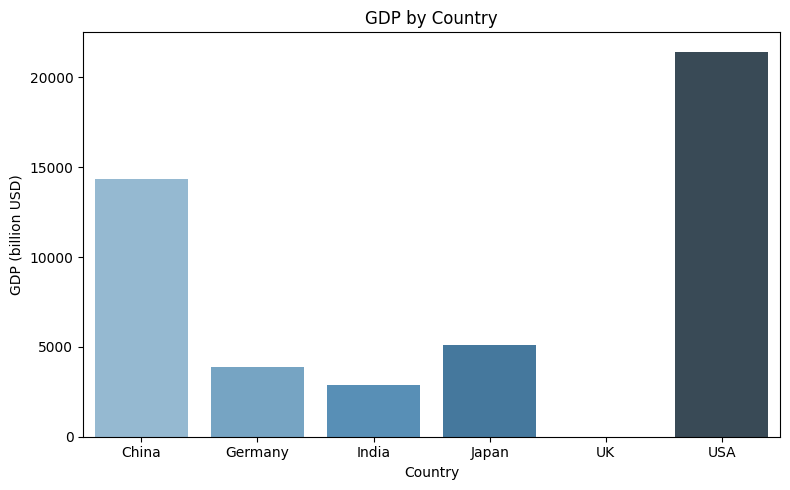

/var/folders/6c/wrrn1gpx26q5r1jr0h59sb5h0000gn/T/ipykernel_3452/3639896152.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_data, x='Country', y='Inflation', palette="Greens_d")


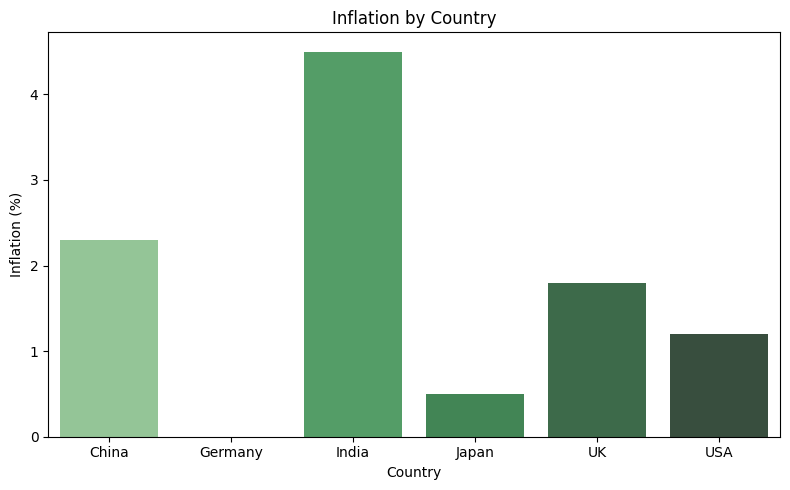

In [7]:
# Plot for GDP
plt.figure(figsize=(8, 5))
sns.barplot(data=merged_data, x='Country', y='GDP', palette="Blues_d")
plt.title('GDP by Country')
plt.xlabel('Country')
plt.ylabel('GDP (billion USD)')
plt.xticks(rotation=0)   # Rotate x-labels by 0 degrees. Change for long x-labels
plt.tight_layout()
plt.show()

# Plot for Inflation
plt.figure(figsize=(8, 5))
sns.barplot(data=merged_data, x='Country', y='Inflation', palette="Greens_d")
plt.title('Inflation by Country')
plt.xlabel('Country')
plt.ylabel('Inflation (%)')
plt.xticks(rotation=0) # Rotate x-labels by 0 degrees. Change for long x-labels
plt.tight_layout()
plt.show()

### Option 2: Plotly

In [8]:
# Create a faceted bar plot
fig = px.bar(long_data, x='Country', y='Value',
    color='Variable',
    facet_col='Variable',
    title='GDP and Inflation by Country',
    labels={'Value': 'Value', 'Country': 'Country'},
    height=400
)

# Ensure separate scales per facet
fig.update_yaxes(matches=None)

# Update layout
fig.update_layout(
    annotations=[
        dict(
            text='GDP in billion USD, Inflation in %',
            xref='paper', yref='paper',
            x=0.5, y=-0.25,
            showarrow=False
        )
    ]
)

fig.show()
